In [1]:
import pandas as pd

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 1878-5713

 Directory of C:\Users\ibrah\Documents\GitHub\YapayZekaKamp\Projects\Titanic

16.10.2022  11:39    <DIR>          .
16.10.2022  11:39    <DIR>          ..
16.10.2022  11:39    <DIR>          .ipynb_checkpoints
16.10.2022  11:39                72 Titanic Survivel Prediction.ipynb
16.10.2022  00:00            28.629 ttest.csv
16.10.2022  00:00            61.194 ttrain.csv
               3 File(s)         89.895 bytes
               3 Dir(s)  114.892.787.712 bytes free


In [3]:
df1=pd.read_csv("ttrain.csv") #modeli eğit

In [87]:
df2=pd.read_csv("ttest.csv") #test dosyasında ki verileri tahmin et

In [5]:
# %40 üzerinde bir başarı varsa başarılı

In [7]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df1.shape

(891, 12)

In [9]:
df2.shape

(418, 11)

In [10]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S


In [11]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,938,1,"Chevre, Mr. Paul Romaine",male,45.0,0,0,PC 17594,29.7,A9,C


In [12]:
df=df1.append(df2)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [14]:
df.shape

(1309, 12)

In [15]:
df.info() #Boş veri var mı yok mu inceliyoruz

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [16]:
df.isnull().sum() #kaç boş veri var 418 tahmin edilecek

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
1014/1309
#½20 den fazlası boşssa o sütun silinebilir

0.774637127578304

Veriyi doldurma yöntemleri

1-Mean - Ortalama
2-Median Orta Değer 
3-En Yakın Komşu
4-Regression
5-Fforward 
6-BBackword
7-En Uygun Olanı ile Doldurma


In [22]:
df["Fare"].mean(), df["Fare"].max(),df["Fare"].min(), df["Fare"].std()

(33.2954792813456, 512.3292, 0.0, 51.75866823917414)

In [24]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean()) #fillna() boşlukları doldurur

In [25]:
import seaborn as sns

<AxesSubplot:xlabel='Embarked', ylabel='count'>

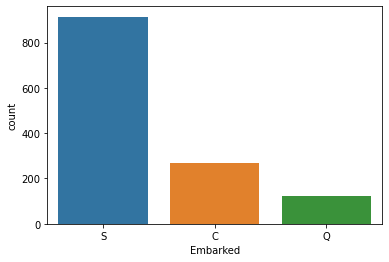

In [26]:
sns.countplot(x=df["Embarked"])

In [27]:
df["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [28]:
df["Embarked"].value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [37]:
#df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode)
df["Embarked"]=df["Embarked"].fillna("S")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

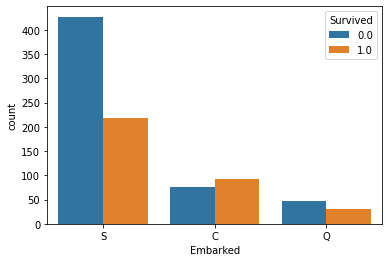

In [38]:
sns.countplot(x="Embarked",hue="Survived",data=df) 
# Binilen limana göre hayatta kalma durumları

In [39]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [40]:
del df["Cabin"] #Sütun siliyoruz çünkü verilerin %77 si boş
#df.drop("Cabin",axis=1,inplace=True) diğer silme komutu

In [41]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [43]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False) #Mrs Mr ifadelerini yakaladık

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [45]:
del df["Name"]

In [46]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [47]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [48]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

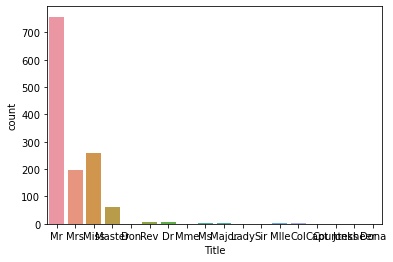

In [49]:
sns.countplot(x=df["Title"])

In [50]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [53]:
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss") #verileri değiştir
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")

In [54]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [55]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [56]:
df.groupby("Sex")["Age"].mean() #Kadın ve erkeklerin yaş ortalaması

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [59]:
 df[df["Age"]<18]["Age"].mean() #18 yaşından küçüklerin ortalaması

9.101753246753248

In [60]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [61]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [62]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [63]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [64]:
df.drop(["PassengerId","Ticket"],axis=1, inplace=True) #axis=1 demek sütun anlamında 0 olursa satır silme işlemi

In [65]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [66]:
data=pd.get_dummies(df,drop_first=True) #Yazıları da rakamlara dönüştürdük

In [67]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [73]:
train=data[:891] #ilk 891 satırı al
test=data[891: ] #891 sonrasını al

In [74]:
y=train["Survived"]

In [75]:
x=train.drop("Survived",axis=1)

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()

In [77]:
g.fit(x,y)
b.fit(x,y)

BernoulliNB()

In [78]:
test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,1,1,1,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,2,0,0,1,0,0,1
2,NaN,2,62.0,0,0,9.6875,1,1,1,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,1,1,0,1,0,1,0
4,NaN,3,22.0,1,1,12.2875,3,0,0,1,0,0,1


In [79]:
del test["Survived"]

In [84]:
tahmin1=g.predict(test)

In [88]:
sonuc=df2[["PassengerId"]]

In [89]:
sonuc["Survived"]=tahmin1

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\1096110125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=tahmin1


In [90]:
sonuc 

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [92]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\2991109546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=sonuc["Survived"].astype("int64")


In [93]:
sonuc

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [95]:
sonuc.to_csv("titanicprediction.csv",index=False)

In [ ]:
# BernoulliNB

In [96]:
tahmin2=b.predict(test)

In [97]:
sonuc=df2[["PassengerId"]]

In [98]:
sonuc["Survived"]=tahmin2

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\1547595637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=tahmin2


In [99]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [100]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\2991109546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=sonuc["Survived"].astype("int64")


In [101]:
sonuc

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [102]:
sonuc.to_csv("titanicpredictionBern.csv",index=False)

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [123]:
def algo_test(x,y):
    G=GaussianNB()
    B=BernoulliNB()
    K=KNeighborsClassifier()
    L=LogisticRegression()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    GBC=GradientBoostingClassifier()
    
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=13)
    
    algos=[G,B,K,L,D,R,GBC]
    algo_names=["GaussianNB","BernoulliNB","KNeighborsClassifier","LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier"]
    r_squared=[]
    rmse=[]
    mae=[]
    
    result = pd.DataFrame(columns=["accuracy_score","precision","recall","f1-score "],index=algo_names)
    
    for algo in algos:
        algo.fit(x_train, y_train)
        
        #r_squared.append(r2_score(y_test,algo.predict(x_test)))
        #rmse.append(mean_squared_error(y_test,algo.predict(x_test))**5)
        #mae.append(mean_absolute_error(y_test, algo.predict(x_test)))
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
        return result.sort_values("R_Squared", ascending=False)

In [124]:
algo_test(x,y)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\3924327170.py:27: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.R_Squared=r_squared
C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\3924327170.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.RMSE=rmse
C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\3924327170.py:29: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.MAE=mae


KeyError: 'R_Squared'

In [127]:
algo_test(x,y)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\3924327170.py:27: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.R_Squared=r_squared
C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\3924327170.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.RMSE=rmse
C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\3924327170.py:29: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  result.MAE=mae


KeyError: 'R_Squared'

# KNeighborsClassifier

In [128]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [129]:
k.fit(x,y)

KNeighborsClassifier()

In [130]:
tahmin3=k.predict(test)

In [131]:
sonuc=df2[["PassengerId"]]

In [134]:
sonuc["Survived"]=tahmin3

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\3328626256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=tahmin3


In [135]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [136]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\2991109546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=sonuc["Survived"].astype("int64")


In [137]:
sonuc.to_csv("titanicpredictionKN.csv",index=False)

# LogisticRegression 

In [138]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [139]:
l.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
tahmin4=l.predict(test)

In [141]:
sonuc=df2[["PassengerId"]]

In [142]:
sonuc["Survived"]=tahmin4

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\1629639268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=tahmin4


In [143]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\2991109546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=sonuc["Survived"].astype("int64")


In [144]:
sonuc.to_csv("titanicpredictionLR.csv",index=False)

# Degision 

In [145]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [146]:
d.fit(x,y)

DecisionTreeClassifier()

In [147]:
tahmin5=d.predict(test)

In [148]:
sonuc=df2[["PassengerId"]]

In [149]:
sonuc["Survived"]=tahmin5

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\959277879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=tahmin5


In [150]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\2991109546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=sonuc["Survived"].astype("int64")


In [151]:
sonuc.to_csv("titanicpredictionDeg.csv",index=False)

# RandomForestClassifier

In [152]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()

In [153]:
r.fit(x,y)

RandomForestClassifier()

In [154]:
tahmin6=r.predict(test)

In [155]:
sonuc=df2[["PassengerId"]]

In [156]:
sonuc["Survived"]=tahmin6

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\265707145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=tahmin6


In [157]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\2991109546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=sonuc["Survived"].astype("int64")


In [158]:
sonuc.to_csv("titanicpredictionRFC.csv",index=False)

# GradientBoostingClassifier

In [159]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [160]:
gb.fit(x,y)

GradientBoostingClassifier()

In [161]:
tahmin7=gb.predict(test)

In [162]:
sonuc=df2[["PassengerId"]]

In [163]:
sonuc["Survived"]=tahmin7

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\3464161199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=tahmin7


In [164]:
sonuc["Survived"]=sonuc["Survived"].astype("int64")

C:\Users\ibrah\AppData\Local\Temp\ipykernel_420\2991109546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=sonuc["Survived"].astype("int64")


In [165]:
sonuc.to_csv("titanicpredictionGBC.csv",index=False)